In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [100]:
df_train = pd.read_csv("../data/train.csv")
df_test=pd.read_csv("../data/test.csv")

# Drop Id columns
df_train = df_train.drop(['Id'],axis=1)
df_test = df_test.drop(['Id'],axis=1)

print("Training Dataframe shape:\t ",df_train.shape,"\nTesting Dataframe shape:\t",df_test.shape)

Training Dataframe shape:	  (1460, 80) 
Testing Dataframe shape:	 (1459, 79)


In [101]:
continuous_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF",
                   "TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageArea","WoodDeckSF",
                   "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","LowQualFinSF",
                   "BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
                   "Fireplaces","GarageCars"
                  ]

ordinal_variable = ['ExterQual','ExterCond','BsmtQual','BsmtCond',
            'HeatingQC','Electrical','KitchenQual','FireplaceQu',
            'GarageFinish','GarageQual','GarageCond','PoolQC',
            'BsmtExposure','BsmtFinType1','BsmtFinType2']

categorical_cols = [x for x in list(df_train.iloc[:,:-1].columns) if x not in (continuous_cols+ordinal_variable)]

In [102]:
def replace_nan(df):
    continuous_cols = ["LotFrontage","LotArea",
                       "MasVnrArea","BsmtFinSF1",
                       "BsmtFinSF2", "BsmtUnfSF",
                       "TotalBsmtSF","1stFlrSF",
                       "2ndFlrSF","GrLivArea",
                       "GarageArea","WoodDeckSF",
                       "OpenPorchSF","EnclosedPorch",
                       "3SsnPorch","ScreenPorch",
                       "PoolArea","MiscVal",
                       "LowQualFinSF","SalePrice"
                      ]
    
    cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
    for i in cols:
        df[i] = df[i].fillna("None")
        
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].apply(lambda x: x.fillna(x.mean()))
    
    cols = [
    'GarageCond','GarageQual',
    'GarageFinish','GarageType'
    ]

    for i in cols:
        df[i] = df[i].fillna("None")
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
    
    cols = [
    'BsmtCond','BsmtExposure',
    'BsmtQual','BsmtFinType2',
    'BsmtFinType1'
    ]
    for i in cols:
        df[i] = df[i].fillna("None")
        
    for i in df.columns:
        if df[i].isnull().sum() > 0:
            if i in continuous_cols:
                df[i] = (df[i].fillna(df[i].mean()))
            else:
                df[i] = (df[i].fillna(df[i].mode()[0]))
    
    return df

In [103]:
def util(val):
    if(val in ('Ex','GLQ','SBrkr')):
        return 5
    elif(val in ('Gd','ALQ','Rec','FuseA')):
        return 4
    elif(val in ('Ta','Av','BLQ','FuseF','Fin')):
        return 3
    elif(val in ('Fa','Mn','LwQ','FuseP','RFn')):
        return 2
    elif(val in ('Po','No','Unf','Mix','Unf')):
        return 1
    else:
        return 0

def string_to_numbers(df):
    cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond',
            'HeatingQC','Electrical','KitchenQual','FireplaceQu',
            'GarageFinish','GarageQual','GarageCond','PoolQC',
            'BsmtExposure','BsmtFinType1','BsmtFinType2']
    
    for i in cols:
        df[i] = df.apply(lambda x:util(x[i]),axis=1).astype(int)
    return df

In [104]:
df_train = replace_nan(df_train)
df_test = replace_nan(df_test)
print(df_train.shape,df_test.shape)

(1460, 80) (1459, 79)


In [105]:
df_train = string_to_numbers(df_train)
df_test = string_to_numbers(df_test)
print(df_train.shape,df_test.shape)

(1460, 80) (1459, 79)


## Let's look at Correlation Matrix

In [106]:
corr = df_train[(continuous_cols+ordinal_variable+['SalePrice'])].corr('spearman')
pd.set_option("max_columns",None)
corr.iloc[-1:,:].T

,SalePrice
LotFrontage,0.409649
LotArea,0.456461
MasVnrArea,0.422884
BsmtFinSF1,0.301871
BsmtFinSF2,-0.038806
BsmtUnfSF,0.185197
TotalBsmtSF,0.602725
1stFlrSF,0.575408
2ndFlrSF,0.293598
GrLivArea,0.731310


### WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, ScreenPorch are kind of porch.
### Porch: A porch is a covered shelter attached to the front of the entrance of a house or building in general. The structure is external to the walls of the building but it may be enclosed in certain types of frames including walls, columns or screens, extending from the main structure

### Let's get combined porch area

In [107]:
df_train['CombinedPorch'] = df_train['WoodDeckSF'] + df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch']
df_test['CombinedPorch'] = df_test['WoodDeckSF'] + df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch']

df_train[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','CombinedPorch']].head()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,CombinedPorch
0,0,61,0,0,0,61
1,298,0,0,0,0,298
2,0,42,0,0,0,42
3,0,35,272,0,0,307
4,192,84,0,0,0,276


### GrLivArea = 1stFlrSF + 2ndFlrSF

In [108]:
df_train[['1stFlrSF','2ndFlrSF','GrLivArea']].head()

,1stFlrSF,2ndFlrSF,GrLivArea
0,856,854,1710
1,1262,0,1262
2,920,866,1786
3,961,756,1717
4,1145,1053,2198


### TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF

In [109]:
df_train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706,0,150,856
1,978,0,284,1262
2,486,0,434,920
3,216,0,540,756
4,655,0,490,1145


### Let's combine GrLivArea, TotalBsmtSF, GarageArea and CombinedPorch to get the total usable area on the property

In [110]:
df_train['TotalUsable'] = df_train['GrLivArea']+df_train['TotalBsmtSF']+df_train['GarageArea']+df_train['CombinedPorch']
df_test['TotalUsable'] = df_test['GrLivArea']+df_test['TotalBsmtSF']+df_test['GarageArea']+df_test['CombinedPorch']

df_train[['GrLivArea','TotalBsmtSF','GarageArea','CombinedPorch','TotalUsable']].head()

,GrLivArea,TotalBsmtSF,GarageArea,CombinedPorch,TotalUsable
0,1710,856,548,61,3175
1,1262,1262,460,298,3282
2,1786,920,608,42,3356
3,1717,756,642,307,3422
4,2198,1145,836,276,4455


### Lotarea = Total area of the property

### Let's find out the area which is free. For that I will subtract 1stFlrSF (assuming this to be area occupied by house), PoolArea, GarageArea, LotFrontage and CombinedPorch from LotArea

In [111]:
df_train['FreeArea']=df_train['LotArea']-(df_train['1stFlrSF']+df_train['PoolArea']+df_train['GarageArea']+df_train['LotFrontage']+df_train['CombinedPorch'])
df_test['FreeArea']=df_test['LotArea']-(df_test['1stFlrSF']+df_test['PoolArea']+df_test['GarageArea']+df_test['LotFrontage']+df_test['CombinedPorch'])

df_train[['LotArea','1stFlrSF','PoolArea','GarageArea','LotFrontage','CombinedPorch','FreeArea']].head()

,LotArea,1stFlrSF,PoolArea,GarageArea,LotFrontage,CombinedPorch,FreeArea
0,8450,856,0,548,65.0,61,6920.0
1,9600,1262,0,460,80.0,298,7500.0
2,11250,920,0,608,68.0,42,9612.0
3,9550,961,0,642,60.0,307,7580.0
4,14260,1145,0,836,84.0,276,11919.0


### We have BsmtFinType1 and BsmtFinType2 for BsmtFinSF1 and BsmtFinSF2. Let's Calculate Weighted basement area as follows

In [112]:
df_train['WeightedBsmt'] = df_train['BsmtFinSF1']*df_train['BsmtFinType1']+df_train['BsmtFinSF2']*df_train['BsmtFinType2']+df_train['BsmtUnfSF']
df_test['WeightedBsmt'] = df_test['BsmtFinSF1']*df_test['BsmtFinType1']+df_test['BsmtFinSF2']*df_test['BsmtFinType2']+df_test['BsmtUnfSF']

df_train[['BsmtFinSF1','BsmtFinSF2','BsmtFinType1','BsmtFinType2','BsmtUnfSF','WeightedBsmt']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtUnfSF,WeightedBsmt
0,706,0,5,1,150,3680
1,978,0,4,1,284,4196
2,486,0,5,1,434,2864
3,216,0,4,1,540,1404
4,655,0,5,1,490,3765


### BsmtQual evaluates height of the basement. Let's multiply it with TotalBsmtSF to get a rough volume

In [113]:
df_train['BsmtVol']=df_train['TotalBsmtSF']*df_train['BsmtQual']
df_test['BsmtVol']=df_test['TotalBsmtSF']*df_test['BsmtQual']

df_train[['TotalBsmtSF','BsmtQual','BsmtVol']].head()

,TotalBsmtSF,BsmtQual,BsmtVol
0,856,4,3424
1,1262,4,5048
2,920,4,3680
3,756,0,0
4,1145,4,4580


### We have quality rating for Garage. Let's calculate WeightedGarageArea as

In [114]:
df_train['WeightedGarageArea'] = df_train['GarageArea']*df_train['GarageFinish']
df_test['WeightedGarageArea'] = df_test['GarageArea']*df_test['GarageFinish']

df_train[['GarageArea','GarageFinish','WeightedGarageArea']].head()

,GarageArea,GarageFinish,WeightedGarageArea
0,548,2,1096
1,460,2,920
2,608,2,1216
3,642,1,642
4,836,2,1672


### We have Multiple Feature for Bath (BsmtFullBath, BsmtHalfBath, FullBath, HalfBath). Let's combine them all to make one

In [115]:
df_train['TotalBaths']=df_train['BsmtFullBath']+df_train['FullBath']+0.5*(df_train['HalfBath']+df_train['BsmtHalfBath'])
df_test['TotalBaths']=df_test['BsmtFullBath']+df_test['FullBath']+0.5*(df_test['HalfBath']+df_test['BsmtHalfBath'])

df_train[['BsmtFullBath','FullBath','HalfBath','BsmtHalfBath','TotalBaths']].head()

,BsmtFullBath,FullBath,HalfBath,BsmtHalfBath,TotalBaths
0,1,2,1,0,3.5
1,0,2,0,1,2.5
2,1,2,1,0,3.5
3,1,1,0,0,2.0
4,1,2,1,0,3.5


### ExterQual = quality of the material on the exterior and MasVnrArea = Masonry veneer area and Masonry veneer = Stylish Brick wall. Therefore let's create a weighted column for it

In [116]:
df_train['WeightedExtern']=df_train['MasVnrArea']*df_train['ExterQual']
df_test['WeightedExtern']=df_test['MasVnrArea']*df_test['ExterQual']

df_train[['MasVnrArea','ExterQual','WeightedExtern']].head()

,MasVnrArea,ExterQual,WeightedExtern
0,196.0,4,784.0
1,0.0,0,0.0
2,162.0,4,648.0
3,0.0,0,0.0
4,350.0,4,1400.0


### We have YearBuilt = Year of Construction and YearRemodAdd = Year of Remodel. Let's add them to create Remod = YearBuilt + YearRemodAdd. High value of Remod indicate that the house was remodeled recently or was constructed recently

In [117]:
df_train['YearSum'] = df_train['YearBuilt']+df_train['YearRemodAdd']
df_test['YearSum'] = df_test['YearBuilt']+df_test['YearRemodAdd']

df_train[['YearBuilt','YearRemodAdd','YearSum']].head()

,YearBuilt,YearRemodAdd,YearSum
0,2003,2003,4006
1,1976,1976,3952
2,2001,2002,4003
3,1915,1970,3885
4,2000,2000,4000


### Create column for weighted kitchen number as WeightedKitchen = KitchenQual*KitchenAbvGr

In [118]:
df_train['WeightedKitchen'] = df_train['KitchenQual']*df_train['KitchenAbvGr']
df_test['WeightedKitchen'] = df_test['KitchenQual']*df_test['KitchenAbvGr']

df_train[['KitchenQual','KitchenAbvGr','WeightedKitchen']].head()

,KitchenQual,KitchenAbvGr,WeightedKitchen
0,4,1,4
1,0,1,0
2,4,1,4
3,4,1,4
4,4,1,4


### Getting Correlation of SalePrice with New Features

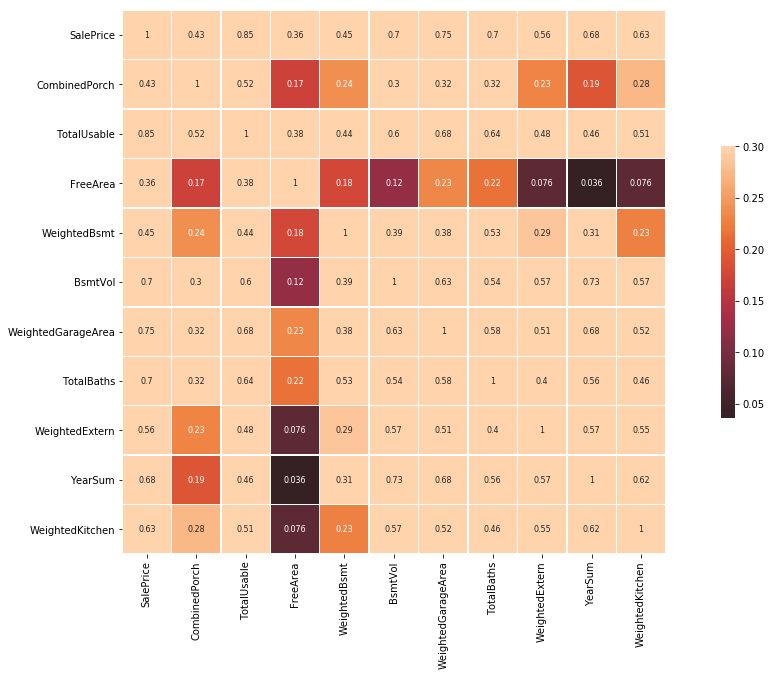

In [125]:
all_continuos = [x for x in list(df_train.columns) 
                 if x not in (categorical_cols+continuous_cols+ordinal_variable)]
corr = df_train[(all_continuos)].corr('spearman')
# pd.set_option("max_columns",None)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,annot_kws={"size": 8})

In [120]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CombinedPorch,TotalUsable,FreeArea,WeightedBsmt,BsmtVol,WeightedGarageArea,TotalBaths,WeightedExtern,YearSum,WeightedKitchen
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,0,PConc,4,0,1,5,706,1,0,150,856,GasA,5,Y,5,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,2,2,548,0,0,Y,0,61,0,0,0,0,0,None,None,0,2,2008,WD,Normal,208500,61,3175,6920.0,3680,3424,1096,3.5,784.0,4006,4
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,0,0,CBlock,4,0,4,4,978,1,0,284,1262,GasA,5,Y,5,1262,0,0,1262,0,1,2,0,3,1,0,6,Typ,1,0,Attchd,1976.0,2,2,460,0,0,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500,298,3282,7500.0,4196,5048,920,2.5,0.0,3952,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,0,PConc,4,0,2,5,486,1,0,434,920,GasA,5,Y,5,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,0,Attchd,2001.0,2,2,608,0,0,Y,0,42,0,0,0,0,0,None,None,0,9,2008,WD,Normal,223500,42,3356,9612.0,2864,3680,1216,3.5,648.0,4003,4
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,0,0,BrkTil,0,4,1,4,216,1,0,540,756,GasA,4,Y,5,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,1,3,642,0,0,Y,0,35,272,0,0,0,0,None,None,0,2,2006,WD,Abnorml,140000,307,3422,7580.0,1404,0,642,2.0,0.0,3885,4
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,0,PConc,4,0,3,5,655,1,0,490,1145,GasA,5,Y,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,0,Attchd,2000.0,2,3,836,0,0,Y,192,84,0,0,0,0,0,None,None,0,12,2008,WD,Normal,250000,276,4455,11919.0,3765,4580,1672,3.5,1400.0,4000,4
